<a href="https://colab.research.google.com/github/assiou349/DS_Case-Study/blob/main/think_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

Downloaded thinkstats.py


In [2]:
try:
    import empiricaldist
except ImportError:
    %pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.9.0-py3-none-any.whl size=14297 sha256=4a62334173e7470d3168a83c9364142a8de3c20937f8516a844928b3af2b0edf
  Stored in directory: /root/.cache/pip/wheels/26/56/da/ea90b6b66dc5e72379a64e2819815066873f00c1350126e876
Successfully built empiricaldist


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML
from thinkstats import decorate

In [4]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [5]:
try:
    import statadict
except ImportError:
    %pip install statadict

In [6]:
from statadict import parse_stata_dict


def read_stata(dct_file, dat_file):
    stata_dict = parse_stata_dict(dct_file)
    resp = pd.read_fwf(
        dat_file,
        names=stata_dict.names,
        colspecs=stata_dict.colspecs,
        compression="gzip",
    )

    return resp

In [9]:
dct_file = "2002FemPreg.dct"
dat_file = "2002FemPreg.dat.gz"

In [10]:
preg = read_stata(dct_file, dat_file)

In [11]:
preg.shape

(13593, 243)

In [12]:
preg.head()


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231


In [13]:
preg.columns


Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'poverty_i', 'laborfor_i', 'religion_i', 'metro_i', 'basewgt',
       'adj_mod_basewgt', 'finalwgt', 'secu_p', 'sest', 'cmintvw'],
      dtype='object', length=243)

In [14]:
pregordr = preg["pregordr"]
type(pregordr)

pandas.core.series.Series

In [15]:
pregordr.head()

,pregordr
0,1
1,2
2,1
3,2
4,3


In [16]:
preg["outcome"].value_counts().sort_index()


,count
outcome,
1,9148
2,1862
3,120
4,1921
5,190
6,352


In [19]:
counts = preg["birthwgt_lb"].value_counts(dropna=False).sort_index()
counts

,count
birthwgt_lb,
0.0,8
1.0,40
2.0,53
3.0,98
4.0,229
5.0,697
6.0,2223
7.0,3049
8.0,1889


In [20]:
counts.loc[0:5]

,count
birthwgt_lb,
0.0,8
1.0,40
2.0,53
3.0,98
4.0,229
5.0,697


In [21]:
counts.loc[0:5].sum()

np.int64(1125)

In [22]:
preg["birthwgt_lb"] = preg["birthwgt_lb"].replace([51, 97, 98, 99], np.nan)


In [23]:
preg["agepreg"].mean()


np.float64(2468.8151197039497)

In [24]:
preg["agepreg"] /= 100.0


In [25]:
preg["agepreg"].mean()


np.float64(24.6881511970395)

In [26]:
preg["birthwgt_oz"].value_counts(dropna=False).sort_index()


,count
birthwgt_oz,
0.0,1037
1.0,408
2.0,603
3.0,533
4.0,525
5.0,535
6.0,709
7.0,501
8.0,756


In [27]:
preg["birthwgt_oz"] = preg["birthwgt_oz"].replace([97, 98, 99], np.nan)


In [28]:
preg["totalwgt_lb"] = preg["birthwgt_lb"] + preg["birthwgt_oz"] / 16.0
preg["totalwgt_lb"].mean()

np.float64(7.265628457623368)

In [29]:
weights = preg["totalwgt_lb"]
n = weights.count()
n

np.int64(9038)

In [30]:
mean = weights.sum() / n
mean

np.float64(7.265628457623368)

In [31]:
weights.mean()


np.float64(7.265628457623368)

In [32]:
squared_deviations = (weights - mean) ** 2


In [33]:
var = squared_deviations.sum() / n
var

np.float64(1.983070989750022)

In [34]:
weights.var()


1.9832904288326532

In [35]:
weights.var(ddof=0)


1.9830709897500207

In [36]:
std = np.sqrt(var)
std

np.float64(1.40821553384062)

In [37]:
weights.std(ddof=0)


1.4082155338406195

In [38]:
subset = preg.query("caseid == 10229")
subset.shape

(7, 244)

In [39]:
subset["outcome"].values


array([4, 4, 4, 4, 4, 4, 1])

In [40]:
from empiricaldist import FreqTab


In [41]:
t = [1.0, 2.0, 2.0, 3.0, 5.0]


In [42]:
ftab = FreqTab.from_seq(t)
ftab

,
1.0,1
2.0,2
3.0,1
5.0,1


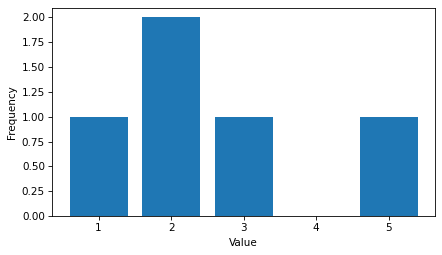

In [43]:
ftab.bar()
decorate(xlabel="Value", ylabel="Frequency")

In [44]:
ftab[2.0]


np.int64(2)

In [45]:
ftab(2.0)


np.int64(2)

In [46]:
ftab(4.0)


0

In [47]:
ftab.qs


array([1., 2., 3., 5.])

In [48]:
ftab.fs


array([1, 2, 1, 1])

In [49]:
for x, freq in ftab.items():
    print(x, freq)

1.0 1
2.0 2
3.0 1
5.0 1


In [50]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

Downloaded nsfg.py


In [51]:
from nsfg import read_fem_preg

preg = read_fem_preg()

In [52]:
live = preg.query("outcome == 1")


In [53]:
ftab_lb = FreqTab.from_seq(live["birthwgt_lb"], name="birthwgt_lb")


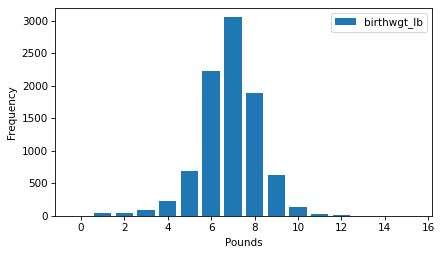

In [54]:
ftab_lb.bar()
decorate(xlabel="Pounds", ylabel="Frequency")

In [55]:
ftab_lb.idxmax() #mode


np.float64(7.0)

In [56]:
ftab_lb.mode()


np.float64(7.0)

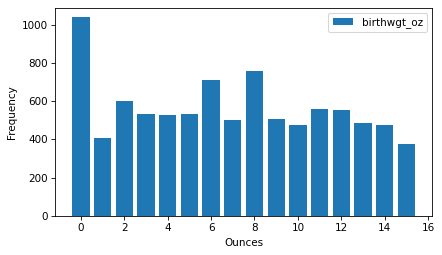

In [57]:
ftab_oz = FreqTab.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
ftab_oz.bar()
decorate(xlabel="Ounces", ylabel="Frequency")

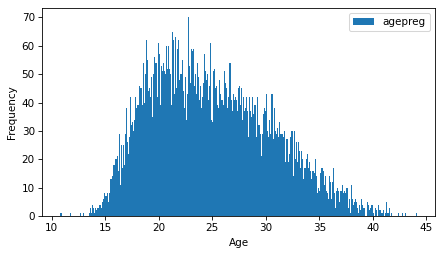

In [58]:
ftab_age = FreqTab.from_seq(live["agepreg"], name="agepreg")
ftab_age.bar(width=0.1)
decorate(xlabel="Age", ylabel="Frequency")

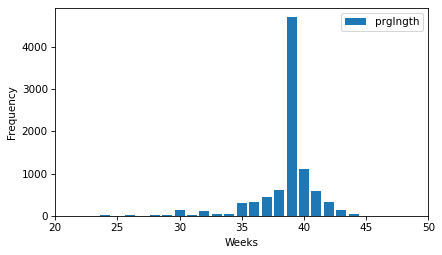

In [59]:
ftab_length = FreqTab.from_seq(live["prglngth"], name="prglngth")
ftab_length.bar()
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [60]:
def smallest(ftab, n=10):
    return ftab[:n]

In [61]:
smallest(ftab_length)

,prglngth
prglngth,
0,1
4,1
9,1
13,1
17,2
18,1
19,1
20,1
21,2


In [62]:
def largest(ftab, n=10):
    return ftab[-n:]

In [64]:
largest(ftab_length)


,prglngth
prglngth,
40,1116
41,587
42,328
43,148
44,46
45,10
46,1
47,1
48,7


In [65]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

In [66]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name="firsts")
ftab_other = FreqTab.from_seq(others["prglngth"], name="others")

In [67]:
def two_bar_plots(ftab1, ftab2, width=0.45):
    ftab1.bar(align="edge", width=-width)
    ftab2.bar(align="edge", width=width, alpha=0.5)

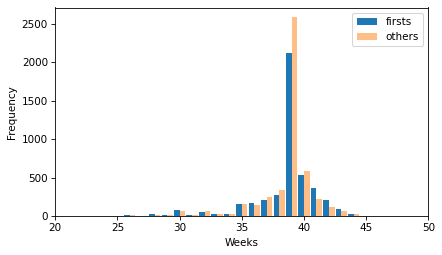

In [68]:
two_bar_plots(ftab_first, ftab_other)
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [69]:
firsts["prglngth"].count(), others["prglngth"].count()


(np.int64(4413), np.int64(4735))

In [70]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean

(np.float64(38.60095173351461), np.float64(38.52291446673706))

In [71]:
diff = first_mean - other_mean


In [72]:
diff, diff * 7 * 24


(np.float64(0.07803726677754952), np.float64(13.11026081862832))

In [73]:
diff / live["prglngth"].mean() * 100


np.float64(0.20237586646738304)

In [74]:
diff / live["prglngth"].std()


np.float64(0.028877623375210333)

In [75]:
group1, group2 = firsts["prglngth"], others["prglngth"]


In [76]:
v1, v2 = group1.var(), group2.var()


In [77]:
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [78]:
np.sqrt(pooled_var)


np.float64(2.702210814495382)

In [79]:
firsts["prglngth"].std(), others["prglngth"].std()


(2.7919014146686947, 2.615852350439255)

In [80]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()

    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

In [81]:
cohen_effect_size(firsts["prglngth"], others["prglngth"])


np.float64(0.028879044654449883)